# Project 2: Choose Your Own Ideas

In this project, you will work in teams to make use of skills you learrned in class to come up with an idea based upon data science technology. Your goal is to design a service/solution, and prepare a pitch for your idea.

Your team needs to decide a problem you would like to solve with a specific type of data, then design a data science approach to solve the problem.

This project is much more open ended.

**NOTE**
* Due Date: April 25, 2023, BEFORE 11:59PM EST
* Please download your code (notebook file as an ipynb file) and include it in your submission.
* There are always last minute issues submitting the project. DO NOT WAIT UNTIL THE LAST MINUTE!



# Problem: pick a data science problem that you plan to solve 
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the available data and data mining and machine learning solutions.

As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets/domains for further consideration, find out a problem which you believe to be important in the market and design your solution. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve. Why the problem is important to solve? Why you believe you could make a big difference with data science technology.

Please briefly describe in the following cell: 

1) The problem you trying to solve:

2) Why the problem is important to solve?

3) What is your idea to solve the problem?

4) What differences you could make with your data science approach?

# Movie Review Sentiment Analysis and New Rating Prediction

## 1) The problem you are trying to solve:

The problem at hand is to perform sentiment analysis on movie reviews and generate new ratings based on the sentiment scores. The goal is to analyze the sentiment expressed in the reviews and provide an enhanced rating system that takes into account the sentiment of the reviews in addition to the original ratings.

## 2) Why the problem is important to solve?

Movie reviews play a crucial role in influencing people's decisions regarding which movies to watch. Traditional rating systems are based solely on numerical ratings given by critics. However, these ratings do not always reflect the sentiment expressed in the reviews. Sentiment analysis provides a way to understand the overall opinion or sentiment conveyed in the reviews. By considering sentiment, we can provide more meaningful and accurate ratings that align with the viewers' expectations. This can help moviegoers make better-informed decisions and improve their movie-watching experiences.

## 3) What is your idea to solve the problem?

The proposed solution involves applying machine learning algorithms to analyze the sentiment of movie reviews and derive new ratings based on the sentiment scores. The sentiment analysis is performed using three different algorithms: LinearSVC, RandomForestClassifier, and MLPClassifier. These algorithms are trained on a merged dataset containing both critic reviews and movie information. The reviews are preprocessed using the CountVectorizer to convert the textual data into numerical features.

Once the models are trained and evaluated, they are used to predict sentiment scores for each review in the dataset. These sentiment scores are then combined with the original ratings to generate new ratings that take into account the sentiment expressed in the reviews.

## 4) What differences you could make with your data science approach?

The data science approach used in this solution offers several advantages and improvements:

a) Sentiment Analysis: By performing sentiment analysis on the movie reviews, we can capture the underlying sentiment expressed by the critics. This goes beyond traditional rating systems that only consider numerical ratings. By considering sentiment, we can provide a more comprehensive and nuanced understanding of the critics' opinions.

b) Enhanced Ratings: The generated new ratings combine the original ratings with the sentiment scores. This provides a more informative rating system that reflects both the critics' numerical ratings and the sentiment expressed in the reviews. By incorporating sentiment, the new ratings can potentially offer a more accurate representation of the overall quality or likability of a movie.

c) Multiple Machine Learning Algorithms: The solution utilizes three different machine learning algorithms (LinearSVC, RandomForestClassifier, and MLPClassifier) for sentiment analysis. Each algorithm has its own strengths and characteristics, and by using multiple algorithms, we can explore different approaches and potentially achieve better accuracy in sentiment prediction.

d) Flexibility and Adaptability: The solution provides a flexible framework that can be easily extended or modified. Additional machine learning algorithms can be incorporated for sentiment analysis, or the existing algorithms can be fine-tuned to improve performance. The solution can also be adapted to different types of movie review datasets or extended to other domains beyond movie reviews.

By combining sentiment analysis with the original ratings, the proposed data science approach aims to provide a more comprehensive and accurate rating system that can assist moviegoers in making informed decisions and enhance their movie-watching experiences.






# Data Collection: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Reading critic reviews
critic_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')
# Read movie data
movies_df = pd.read_csv('rotten_tomatoes_movies.csv')

# Join both datasets
merged_df = critic_reviews_df.merge(movies_df, on='rotten_tomatoes_link')
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129887 entries, 0 to 1129886
Data columns (total 29 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   rotten_tomatoes_link              1129887 non-null  object 
 1   critic_name                       1111366 non-null  object 
 2   top_critic                        1129887 non-null  bool   
 3   publisher_name                    1129887 non-null  object 
 4   review_type                       1129887 non-null  object 
 5   review_score                      823985 non-null   object 
 6   review_date                       1129887 non-null  object 
 7   review_content                    1064109 non-null  object 
 8   movie_title                       1129887 non-null  object 
 9   movie_info                        1120202 non-null  object 
 10  critics_consensus                 991907 non-null   object 
 11  content_rating                    112

In [ ]:
# Exploring the merged datasets
merged_df.head(5)

rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  \
0  A fantasy adventure that fuses Greek mythology...   
1  Uma Thurman as Medusa, the gorgon with a coiff...   
2  With a top-notch cast and dazzling special eff...   
3  Whether audiences will get behind The Lightnin...   
4  What's really lacking in The Lightning Thief i...   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1  Percy Jackson & the Olympians: The Lightning T...   
2  Percy Jackson & the Olympians: The Lightning T...   
3  Percy Jackson & the Olympians: The Lightning T...   
4  Percy Jackson & the Olympians: The Lightning T...   

                                          movie_info  ... production_company  \
0  Always trouble-prone, the life of teenager Per...  ...   20th Century Fox   
1  Always trouble-prone, the life of teenager Per...  ...   20th Century Fox   
2  Always trouble-prone, the life of teenager Per...  ...   20th Century Fox   
3  Always trouble-prone, the life of teenager Per...  ...   20th Century Fox   
4  Always trouble-prone, the life of teenager Per...  ...   20th Century Fox   

  tomatometer_status tomatometer_rating tomatometer_count audience_status  \
0             Rotten               49.0             149.0         Spilled   
1             Rotten               49.0             149.0         Spilled   
2             Rotten               49.0             149.0         Spilled   
3             Rotten               49.0             149.0         Spilled   
4             Rotten               49.0             149.0         Spilled   

  audience_rating audience_count tomatometer_top_critics_count  \
0            53.0       254421.0                            43   
1            53.0       254421.0                            43   
2            53.0       254421.0                            43   
3            53.0       254421.0                            43   
4            53.0       254421.0                            43   

   tomatometer_fresh_critics_count tomatometer_rotten_critics_count  
0                               73                               76  
1                               73                               76  
2                               73                               76  
3                               73                               76  
4                               73                               76  

[5 rows x 29 columns]

In [ ]:
# We will filter our the non-relevant features and keep the relevant features
features = ['rotten_tomatoes_link', 'top_critic', 'publisher_name', 'review_type', 'review_score', 'review_date', 'review_content', 'movie_title', 'movie_info', 'critics_consensus',
            'content_rating', 'genres']
merged_df = merged_df[features]
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129887 entries, 0 to 1129886
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1129887 non-null  object
 1   top_critic            1129887 non-null  bool  
 2   publisher_name        1129887 non-null  object
 3   review_type           1129887 non-null  object
 4   review_score          823985 non-null   object
 5   review_date           1129887 non-null  object
 6   review_content        1064109 non-null  object
 7   movie_title           1129887 non-null  object
 8   movie_info            1120202 non-null  object
 9   critics_consensus     991907 non-null   object
 10  content_rating        1129887 non-null  object
 11  genres                1129642 non-null  object
dtypes: bool(1), object(11)
memory usage: 104.5+ MB


## Data Preprocessing

## Removing null values from the dataset

In [ ]:
import numpy as np
import re
import math

# Filtering out null records
merged_df = merged_df[merged_df['review_score'].isna() == False]

# Find review scores with alphabests i.e. Grades
regex_for_decimals_and_fractions = '^(?!.*\d+(?:\.\d+){2})\d*\.?\d*\/?\d*\.?\d*[a-z]*$'
matcher_for_decimals_and_fractions = re.compile(regex_for_decimals_and_fractions)
grades = merged_df[merged_df['review_score'].str.match(regex_for_decimals_and_fractions) == False]['review_score'].unique()
grades.sort()
grades

array(['A', 'A  -', 'A-', 'B', 'B+', 'B-', 'C', 'C  -', 'C+', 'C-', 'D',
       'D+', 'D-', 'F'], dtype=object)

In [ ]:
# Function to convert fractional scores to numerical scores
def fractional_to_score(fraction):
    try:
        numerator, denominator = fraction.split('/')
        return float(numerator) / float(denominator) * 10
    except:
        return np.nan

# Function to convert letter grades to numerical scores
def letter_to_score(letter):
    if letter == 'A':
        return 9
    if letter in ['A  -', 'A-']:
        return 8.5
    if letter == 'B+':
        return 8
    elif letter == 'B':
        return 8.5
    elif letter == 'B-':
        return 8
    elif letter == 'C+':
        return 7.5
    elif letter == 'C':
        return 7
    elif letter in ['C  -', 'C-']:
        return 6.5
    elif letter == 'D+':
        return 6
    elif letter == 'D':
        return 5.5
    elif letter == 'D-':
        return 5
    elif letter == 'F':
        return 4
    else:
        return letter

def convert_review_score(score):
    if not matcher_for_decimals_and_fractions.match(score):
        return letter_to_score(score)
    elif '/' in score:
        return fractional_to_score(score)


merged_df['review_score'] = merged_df['review_score'].apply(convert_review_score)
merged_df

rotten_tomatoes_link  top_critic                   publisher_name  \
3                  m/0814255       False          Sunday Mail (Australia)   
6                  m/0814255       False                   Slant Magazine   
7                  m/0814255        True                 Arizona Republic   
8                  m/0814255       False                              UGO   
9                  m/0814255        True              The Age (Australia)   
...                      ...         ...                              ...   
1129882          m/zulu_dawn       False                 Fantastica Daily   
1129883          m/zulu_dawn       False  Mountain Xpress (Asheville, NC)   
1129884          m/zulu_dawn       False    Dennis Schwartz Movie Reviews   
1129885          m/zulu_dawn       False          Sarasota Herald-Tribune   
1129886          m/zulu_dawn       False             The Last Thing I See   

        review_type  review_score review_date  \
3             Fresh           7.0  2010-02-09   
6            Rotten           2.5  2010-02-10   
7             Fresh           7.0  2010-02-10   
8             Fresh           8.5  2010-02-10   
9             Fresh           6.0  2010-02-10   
...             ...           ...         ...   
1129882      Rotten           4.0  2005-11-02   
1129883       Fresh           7.0  2007-03-07   
1129884       Fresh           8.0  2010-09-16   
1129885      Rotten           7.0  2011-02-28   
1129886      Rotten           7.0  2020-07-09   

                                            review_content  \
3        Whether audiences will get behind The Lightnin...   
6        Harry Potter knockoffs don't come more transpa...   
7        Percy Jackson isn't a great movie, but it's a ...   
8                               Fun, brisk and imaginative   
9        Crammed with dragons, set-destroying fights an...   
...                                                    ...   
1129882                                                NaN   
1129883  Seen today, it's not only a startling indictme...   
1129884  A rousing visual spectacle that's a prequel of...   
1129885  A simple two-act story: Prelude to war, and th...   
1129886  Rides the line between being a pure artifact o...   

                                               movie_title  \
3        Percy Jackson & the Olympians: The Lightning T...   
6        Percy Jackson & the Olympians: The Lightning T...   
7        Percy Jackson & the Olympians: The Lightning T...   
8        Percy Jackson & the Olympians: The Lightning T...   
9        Percy Jackson & the Olympians: The Lightning T...   
...                                                    ...   
1129882                                          Zulu Dawn   
1129883                                          Zulu Dawn   
1129884                                          Zulu Dawn   
1129885                                          Zulu Dawn   
1129886                                          Zulu Dawn   

                                                movie_info  \
3        Always trouble-prone, the life of teenager Per...   
6        Always trouble-prone, the life of teenager Per...   
7        Always trouble-prone, the life of teenager Per...   
8        Always trouble-prone, the life of teenager Per...   
9        Always trouble-prone, the life of teenager Per...   
...                                                    ...   
1129882  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129883  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129884  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129885  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129886  Sir Henry Bartle Frere's (John Mills) vastly o...   

                                         critics_consensus content_rating  \
3        Though it may seem like just another Harry Pot...             PG   
6        Though it may seem like just another Harry Pot...             PG   
7        Though it may seem 

In [ ]:
# Function to convert numbers on a scale
def convert_number_to_scale(score, scale = 10):
    index = 1
    while math.pow(scale, index) < score:
        index += 1
    index -= 1

    return score/math.pow(scale, index)

merged_df['review_score'] = merged_df['review_score'].apply(convert_number_to_scale)
merged_df


rotten_tomatoes_link  top_critic                   publisher_name  \
3                  m/0814255       False          Sunday Mail (Australia)   
6                  m/0814255       False                   Slant Magazine   
7                  m/0814255        True                 Arizona Republic   
8                  m/0814255       False                              UGO   
9                  m/0814255        True              The Age (Australia)   
...                      ...         ...                              ...   
1129882          m/zulu_dawn       False                 Fantastica Daily   
1129883          m/zulu_dawn       False  Mountain Xpress (Asheville, NC)   
1129884          m/zulu_dawn       False    Dennis Schwartz Movie Reviews   
1129885          m/zulu_dawn       False          Sarasota Herald-Tribune   
1129886          m/zulu_dawn       False             The Last Thing I See   

        review_type  review_score review_date  \
3             Fresh           7.0  2010-02-09   
6            Rotten           2.5  2010-02-10   
7             Fresh           7.0  2010-02-10   
8             Fresh           8.5  2010-02-10   
9             Fresh           6.0  2010-02-10   
...             ...           ...         ...   
1129882      Rotten           4.0  2005-11-02   
1129883       Fresh           7.0  2007-03-07   
1129884       Fresh           8.0  2010-09-16   
1129885      Rotten           7.0  2011-02-28   
1129886      Rotten           7.0  2020-07-09   

                                            review_content  \
3        Whether audiences will get behind The Lightnin...   
6        Harry Potter knockoffs don't come more transpa...   
7        Percy Jackson isn't a great movie, but it's a ...   
8                               Fun, brisk and imaginative   
9        Crammed with dragons, set-destroying fights an...   
...                                                    ...   
1129882                                                NaN   
1129883  Seen today, it's not only a startling indictme...   
1129884  A rousing visual spectacle that's a prequel of...   
1129885  A simple two-act story: Prelude to war, and th...   
1129886  Rides the line between being a pure artifact o...   

                                               movie_title  \
3        Percy Jackson & the Olympians: The Lightning T...   
6        Percy Jackson & the Olympians: The Lightning T...   
7        Percy Jackson & the Olympians: The Lightning T...   
8        Percy Jackson & the Olympians: The Lightning T...   
9        Percy Jackson & the Olympians: The Lightning T...   
...                                                    ...   
1129882                                          Zulu Dawn   
1129883                                          Zulu Dawn   
1129884                                          Zulu Dawn   
1129885                                          Zulu Dawn   
1129886                                          Zulu Dawn   

                                                movie_info  \
3        Always trouble-prone, the life of teenager Per...   
6        Always trouble-prone, the life of teenager Per...   
7        Always trouble-prone, the life of teenager Per...   
8        Always trouble-prone, the life of teenager Per...   
9        Always trouble-prone, the life of teenager Per...   
...                                                    ...   
1129882  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129883  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129884  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129885  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129886  Sir Henry Bartle Frere's (John Mills) vastly o...   

                                         critics_consensus content_rating  \
3        Though it may seem like just another Harry Pot...             PG   
6        Though it may seem like just another Harry Pot...             PG   
7        Though it may seem 

## Removing null records for rating and review

In [ ]:
# Filtering out null records
merged_df = merged_df[merged_df['review_score'].isna() == False]
merged_df = merged_df[merged_df['review_content'].isna() == False]
merged_df

rotten_tomatoes_link  top_critic                   publisher_name  \
3                  m/0814255       False          Sunday Mail (Australia)   
6                  m/0814255       False                   Slant Magazine   
7                  m/0814255        True                 Arizona Republic   
8                  m/0814255       False                              UGO   
9                  m/0814255        True              The Age (Australia)   
...                      ...         ...                              ...   
1129876               m/zulu       False                  Empire Magazine   
1129883          m/zulu_dawn       False  Mountain Xpress (Asheville, NC)   
1129884          m/zulu_dawn       False    Dennis Schwartz Movie Reviews   
1129885          m/zulu_dawn       False          Sarasota Herald-Tribune   
1129886          m/zulu_dawn       False             The Last Thing I See   

        review_type  review_score review_date  \
3             Fresh           7.0  2010-02-09   
6            Rotten           2.5  2010-02-10   
7             Fresh           7.0  2010-02-10   
8             Fresh           8.5  2010-02-10   
9             Fresh           6.0  2010-02-10   
...             ...           ...         ...   
1129876       Fresh           8.0  2017-07-10   
1129883       Fresh           7.0  2007-03-07   
1129884       Fresh           8.0  2010-09-16   
1129885      Rotten           7.0  2011-02-28   
1129886      Rotten           7.0  2020-07-09   

                                            review_content  \
3        Whether audiences will get behind The Lightnin...   
6        Harry Potter knockoffs don't come more transpa...   
7        Percy Jackson isn't a great movie, but it's a ...   
8                               Fun, brisk and imaginative   
9        Crammed with dragons, set-destroying fights an...   
...                                                    ...   
1129876  As a spectacular war film with a powerful mora...   
1129883  Seen today, it's not only a startling indictme...   
1129884  A rousing visual spectacle that's a prequel of...   
1129885  A simple two-act story: Prelude to war, and th...   
1129886  Rides the line between being a pure artifact o...   

                                               movie_title  \
3        Percy Jackson & the Olympians: The Lightning T...   
6        Percy Jackson & the Olympians: The Lightning T...   
7        Percy Jackson & the Olympians: The Lightning T...   
8        Percy Jackson & the Olympians: The Lightning T...   
9        Percy Jackson & the Olympians: The Lightning T...   
...                                                    ...   
1129876                                               Zulu   
1129883                                          Zulu Dawn   
1129884                                          Zulu Dawn   
1129885                                          Zulu Dawn   
1129886                                          Zulu Dawn   

                                                movie_info  \
3        Always trouble-prone, the life of teenager Per...   
6        Always trouble-prone, the life of teenager Per...   
7        Always trouble-prone, the life of teenager Per...   
8        Always trouble-prone, the life of teenager Per...   
9        Always trouble-prone, the life of teenager Per...   
...                                                    ...   
1129876  In 1879, the Zulu nation hands colonial Britis...   
1129883  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129884  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129885  Sir Henry Bartle Frere's (John Mills) vastly o...   
1129886  Sir Henry Bartle Frere's (John Mills) vastly o...   

                                         critics_consensus content_rating  \
3        Though it may seem like just another Harry Pot...             PG   
6        Though it may seem like just another Harry Pot...             PG   
7        Though it may seem 

## Removing duplicate reviews

In [ ]:
#view duplicate reviews
review = merged_df['review_content']
duplicated_review = merged_df[review.isin(review[review.duplicated()])].sort_values("review_content")
duplicated_review.head()

rotten_tomatoes_link  top_critic                   publisher_name  \
817537             m/sixth_sense       False                 Flick Filosopher   
817630             m/sixth_sense       False                 Flick Filosopher   
828494       m/snakes_on_a_plane       False  Tyler Morning Telegraph (Texas)   
828500       m/snakes_on_a_plane       False  Tyler Morning Telegraph (Texas)   
664030  m/post_tenebras_lux_2012        True                         Film.com   

       review_type  review_score review_date  \
817537       Fresh           9.0  2000-01-01   
817630       Fresh           9.0  2000-01-01   
828494      Rotten           5.0  2006-08-20   
828500      Rotten           5.0  2006-08-20   
664030       Fresh           8.8  2013-04-29   

                                           review_content        movie_title  \
817537  !), I am overjoyed to report that not only is ...    The Sixth Sense   
817630  !), I am overjoyed to report that not only is ...    The Sixth Sense   
828494  !@#&*! Sam Arkoff must be screaming 'I told yo...  Snakes on a Plane   
828500  !@#&*! Sam Arkoff must be screaming 'I told yo...  Snakes on a Plane   
664030  "'Post Tenebras Lux' works so well because - e...  Post Tenebras Lux   

                                               movie_info  \
817537  Young Cole Sear (Haley Joel Osment) is haunted...   
817630  Young Cole Sear (Haley Joel Osment) is haunted...   
828494  FBI agent Nelville Flynn (Samuel L. Jackson) b...   
828500  FBI agent Nelville Flynn (Samuel L. Jackson) b...   
664030  Juan and his urban family move to the countrys...   

                                        critics_consensus content_rating  \
817537  M Night Shayamalan's The Sixth Sense is a twis...          PG-13   
817630  M Night Shayamalan's The Sixth Sense is a twis...          PG-13   
828494  Snakes on a Plane lives up to its title, featu...              R   
828500  Snakes on a Plane lives up to its title, featu...              R   
664030  Post Tenebras Lux conjures striking imagery am...             NR   

                                                   genres  
817537                                 Mystery & Suspense  
817630                                 Mystery & Suspense  
828494     Action & Adventure, Horror, Mystery & Suspense  
828500     Action & Adventure, Horror, Mystery & Suspense  
664030  Art House & International, Drama, Special Inte...

In [ ]:
merged_df['review_content'].drop_duplicates(inplace = True)
print('The dataset contains {} rows and {} columns after removing duplicates'.format(merged_df.shape[0],merged_df.shape[1]))

The dataset contains 757042 rows and 12 columns after removing duplicates


In [ ]:
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Preprocessing on reviews

In [ ]:
#Removing the square brackets
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)


#stemming words
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# lemmatize words
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

#Removing the noisy text
def preprocess(text):
    # text = text.lower()
    text = remove_square_brackets(text)
    text = remove_stopwords(text)
    text = stem_words(text)
    text = lemmatize_words(text)
    return text

#Apply function on review column
merged_df['review_content']=merged_df['review_content'].apply(preprocess)
merged_df['review_content']

3          whether audienc get behind lightn thief hard e...
6          harri potter knockoff come transpar slapdash j...
7          perci jackson great good trot kernel greek myt...
8                                               brisk imagin
9          cram fight thing squeez paus break friendship ...
                                 ...                        
1129876                     spectacular war film power moral
1129883               seen startl indict british seem remark
1129884    rous visual spectacl prequel cy endfield direc...
1129885    simpl prelud former concern lot british priggi...
1129886    ride line pure artifact bygon depict unrealist...
Name: review_content, Length: 757042, dtype: object

# Data Exploration: Exploring the Dataset



## Distribution of ratings over all dataset

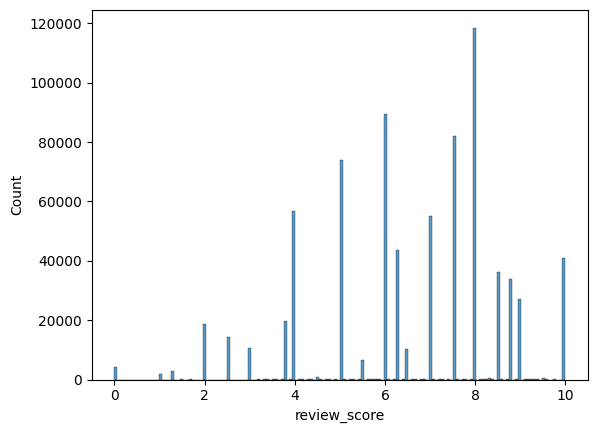

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of variables
sns.histplot(merged_df['review_score'], kde=False)
plt.show()


### Feature engineering & Sentiment addition

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Calculate the sentiment of each review
sentiments = []
for review in merged_df['review_content']:
    sentiment = analyzer.polarity_scores(review)["compound"]
    if sentiment >= 0.05:
        sentiments.append(1)  # Positive sentiment
    elif sentiment <= -0.05:
        sentiments.append(0)  # Negative sentiment
    else:
        sentiments.append(2)  # Neutral sentiment


# Add the sentiment column to the DataFrame
merged_df["sentiment"] = sentiments
merged_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Word cloud of negative sentiments

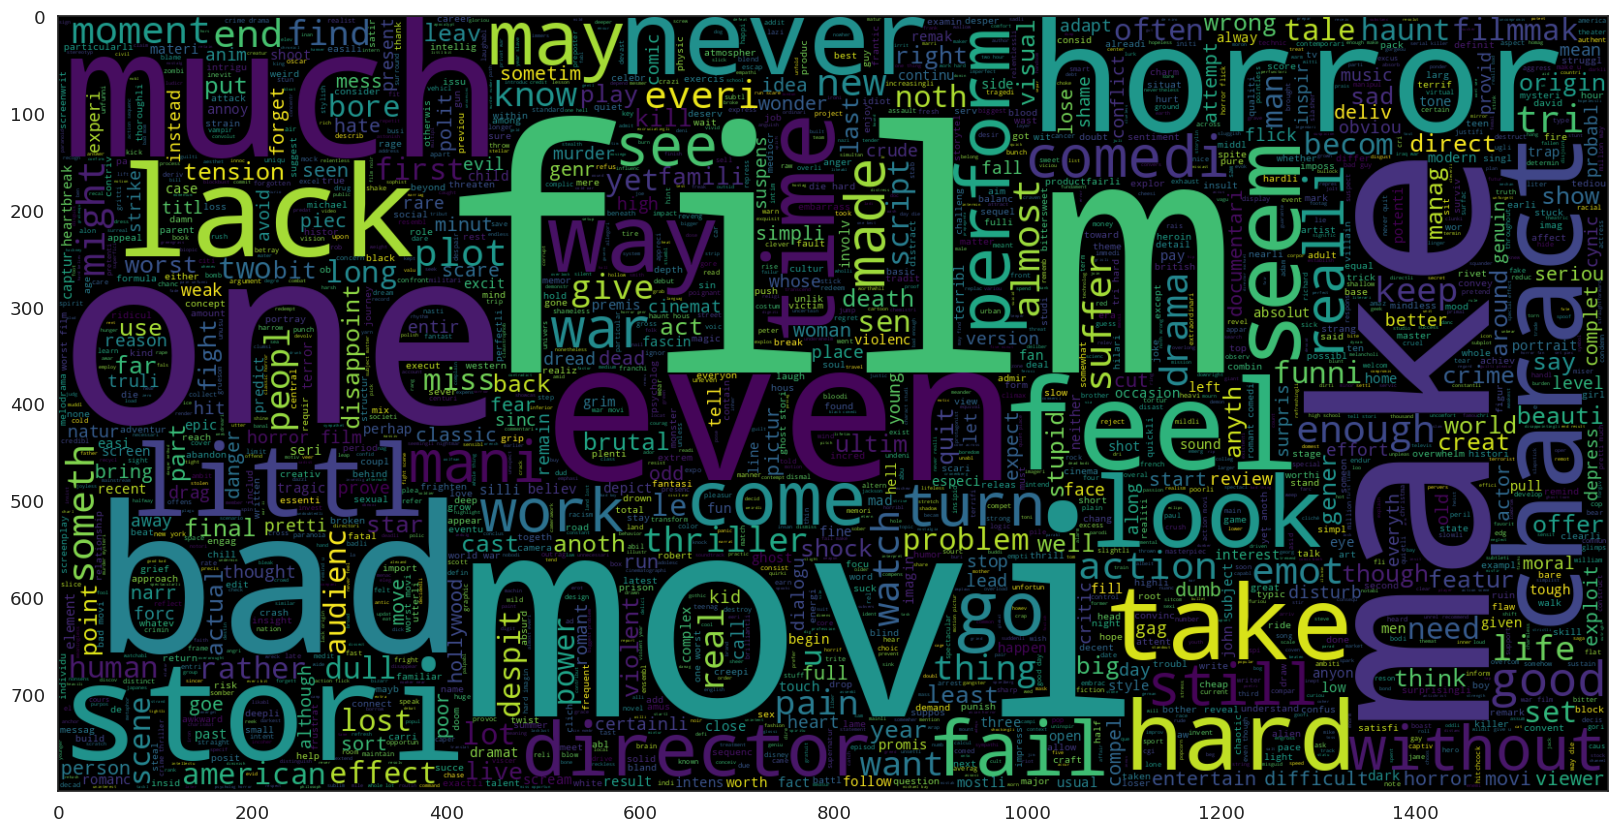

In [ ]:
from wordcloud import WordCloud
sns.set(style = "white" , font_scale = 1.2)
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(merged_df[merged_df.sentiment == 0].review_content))
plt.imshow(wc , interpolation = 'bilinear')

## Word cloud of positive sentiments

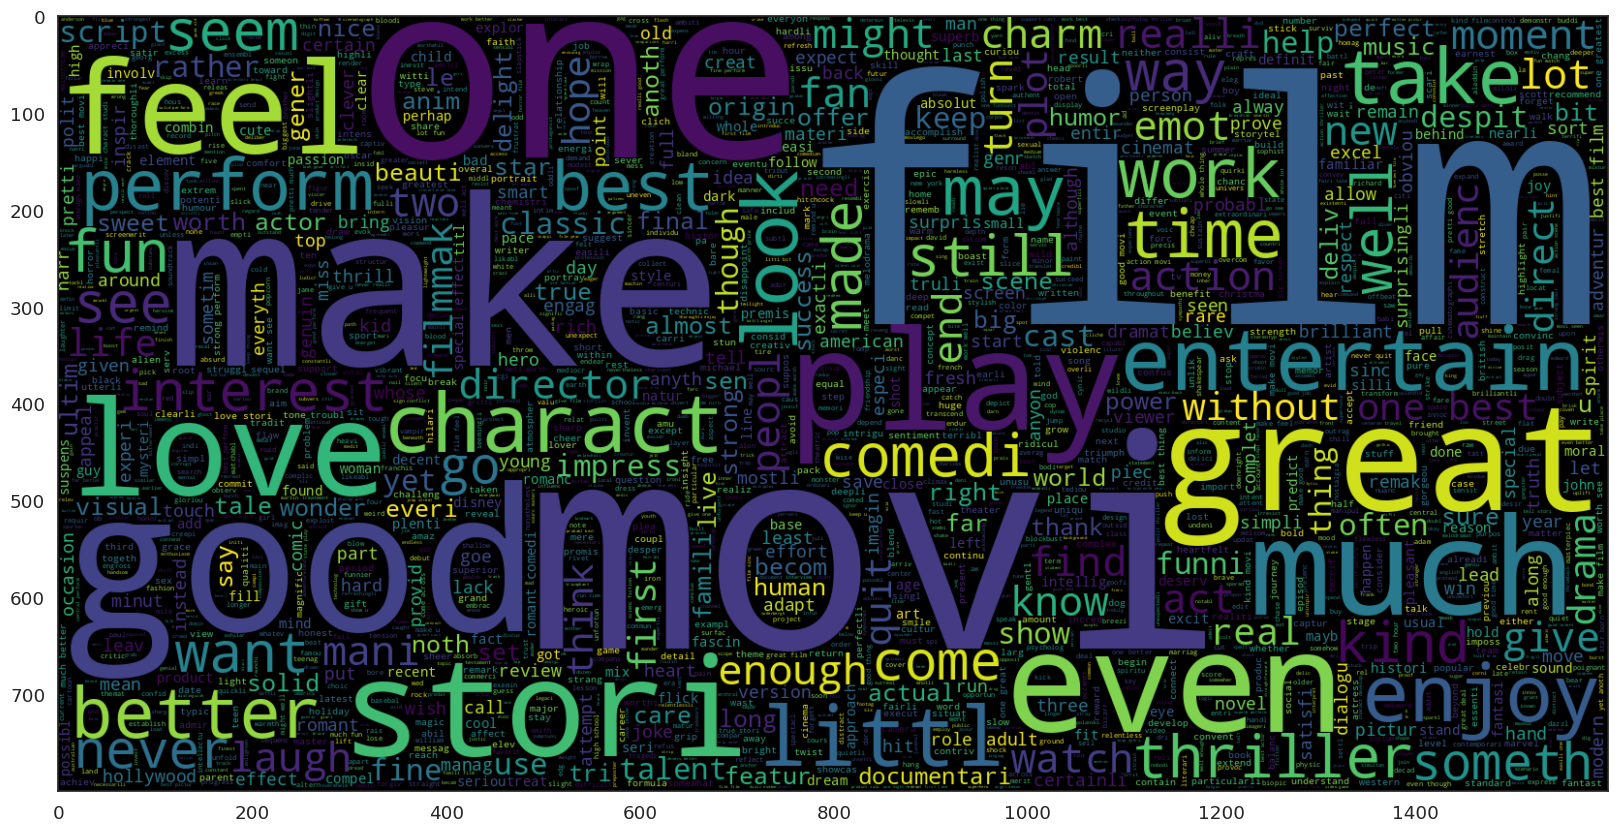

In [ ]:
sns.set(style = "white" , font_scale = 1.2)
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(merged_df[merged_df.sentiment == 1].review_content))
plt.imshow(wc , interpolation = 'bilinear')

## Word cloud of neutral sentiments

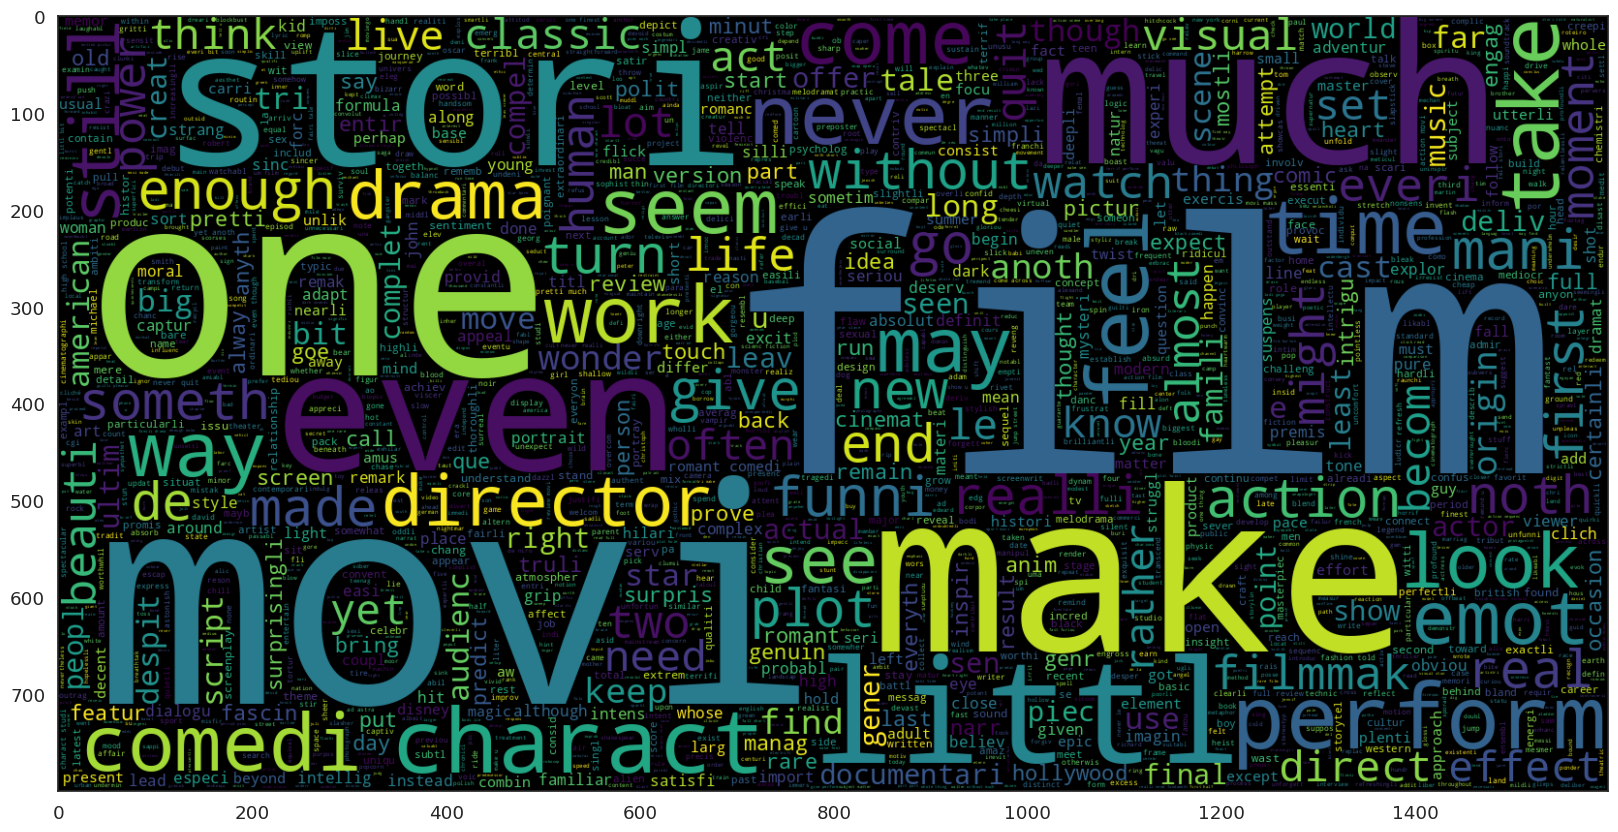

In [ ]:
sns.set(style = "white" , font_scale = 1.2)
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(merged_df[merged_df.sentiment == 2].review_content))
plt.imshow(wc , interpolation = 'bilinear')

## Corpus Collection

In [ ]:
#transforming corpus
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(merged_df.review_content)
corpus[:5]

['whether', 'audienc', 'get', 'behind', 'lightn']

In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

corpus  countv
0   film  102367
1   movi   76924
2   like   55794
3    one   55774
4   make   48783
5  stori   33295
6   even   30371
7   much   29791
8   feel   28295
9   good   26930

<h1> N-gram Analysis </h1>

In [ ]:
texts = ' '.join(merged_df['review_content'])
string = texts.split(" ")

In [ ]:

def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:10]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (10,5))
    return sns.barplot(x='count',y='word', data=n_gram_df)

## Unigram

      word   count
0  (film,)  102367
1  (movi,)   76924
2  (like,)   55794
3   (one,)   55774
4  (make,)   48783


<Axes: xlabel='count', ylabel='word'>

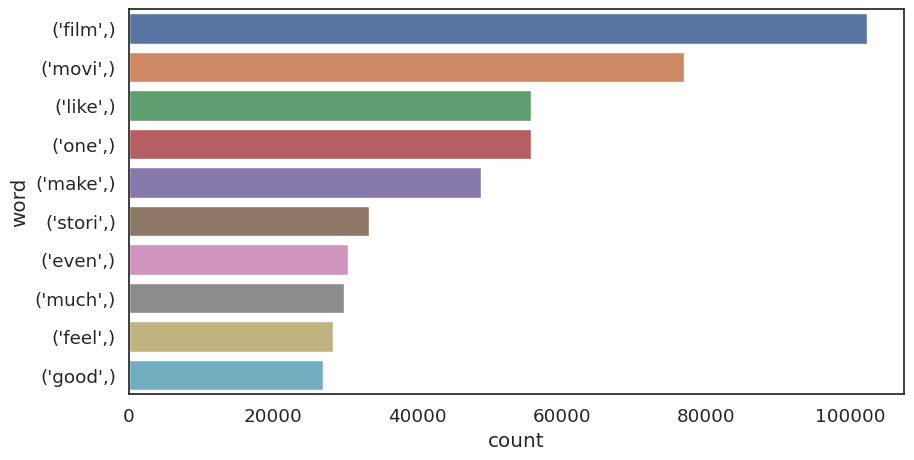

In [ ]:
draw_n_gram(string,1)

## Bigram

               word  count
0      (feel, like)   8221
1       (one, best)   4283
2      (look, like)   2541
3  (romant, comedi)   2233
4      (best, film)   2199


<Axes: xlabel='count', ylabel='word'>

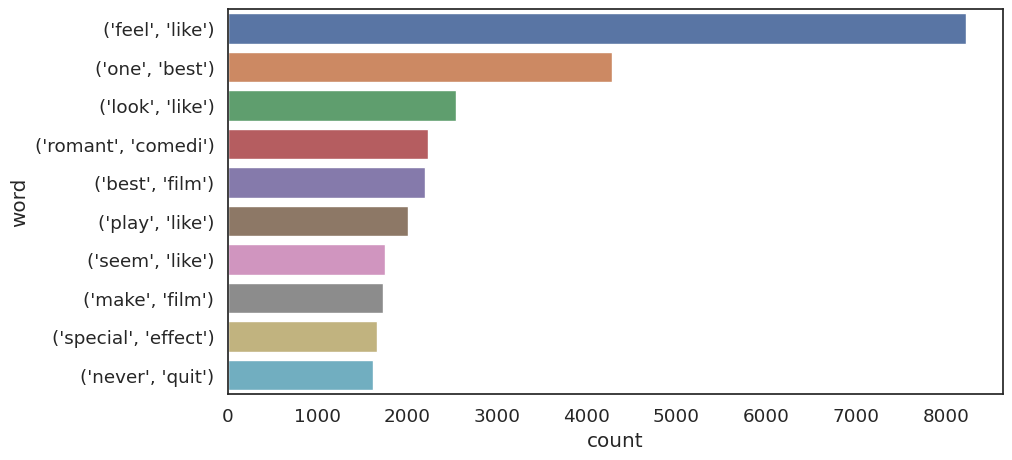

In [ ]:
draw_n_gram(string,2)

## Trigram

                 word  count
0   (one, best, film)    894
1   (one, best, movi)    392
2  (film, feel, like)    387
3  (movi, feel, like)    314
4    (world, war, ii)    274


<Axes: xlabel='count', ylabel='word'>

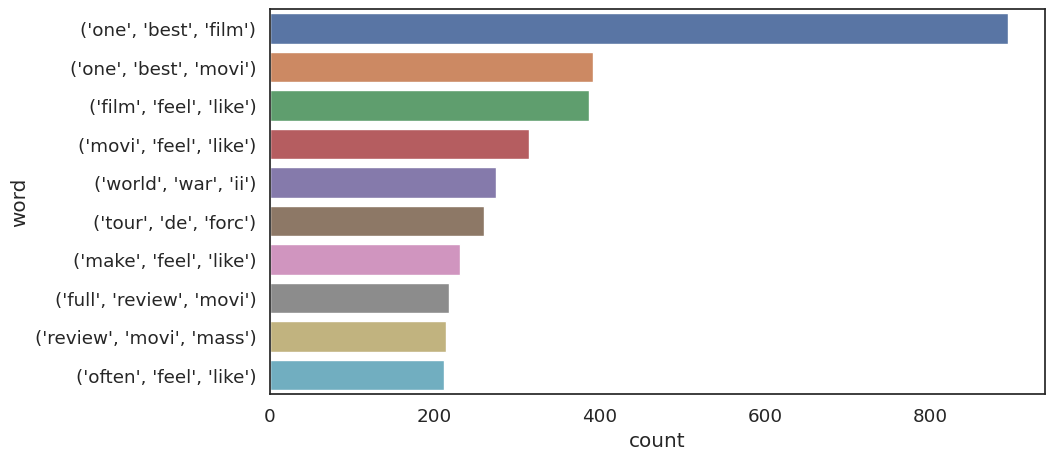

In [ ]:
draw_n_gram(string,3)

This N gram analysis showcase words which are occurring together in Rotten tomatoes data base. From Uni gram we see that ‘film’ word occurs more than 1L times in dataset, which is quite obvious. From Bi gram, we see that ‘feel like’ and ‘one best’ words have occurred more than 7000 times together From Tri gram, we see that ‘one best film’ has observed maximum number of times together

# Data Analysis: you can use different methods to solve the problem you proposed, and find out the best solution.


### Random Forest Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into a training set and a test set
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)

# Preprocess the data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['review_content'])
X_test = vectorizer.transform(test_df['review_content'])
y_train = train_df['sentiment']
y_test = test_df['sentiment']

# Train a Random Forest to predict the likeness score
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


Accuracy: 0.916*100


In [ ]:

# Evaluate the model's performance on the test set
rf_accuracy = rf.score(X_test, y_test)
print(f'Accuracy: {rf_accuracy:.3f}')

# Compute the likeness score for each review in the dataset
rf_likeness_scores = rf.predict_proba(vectorizer.transform(merged_df['review_content']))[:, 1]

merged_df['rf_likeness_scores'] = rf_likeness_scores

# Derive new ratings by combining the original ratings with the likeness scores
merged_df['rf_new_rating'] = merged_df['review_score'] + 2 * (rf_likeness_scores - 0.5)


Accuracy: 0.916


### Linear SVC

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# Split the dataset into a training set and a test set
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)

# Preprocess the data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['review_content'])
X_test = vectorizer.transform(test_df['review_content'])
y_train = train_df['sentiment']
y_test = test_df['sentiment']

# Train a LinearSVC to predict the likeness score
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

# Calibrate the LinearSVC model to produce probability estimates
calibrated_svc = CalibratedClassifierCV(svc)
calibrated_svc.fit(X_train, y_train)


Accuracy: 0.933*100


In [ ]:
# Evaluate the model's performance on the test set
svc_accuracy = calibrated_svc.score(X_test, y_test)
print(f'Accuracy: {svc_accuracy:.3f}')

# Compute the likeness score for each review in the dataset
svc_likeness_scores = calibrated_svc.predict_proba(vectorizer.transform(merged_df['review_content']))[:, 1]

merged_df['svc_likeness_scores'] = svc_likeness_scores

# Derive new ratings by combining the original ratings with the likeness scores
merged_df['svc_new_rating'] = merged_df['review_score'] + 2 * (svc_likeness_scores - 0.5)


Accuracy: 0.933


In [ ]:
merged_df.head()

### Multi-layer Perceptron

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier


# Split the dataset into a training set and a test set
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)

# Preprocess the data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_df['review_content'])
X_test = vectorizer.transform(test_df['review_content'])
y_train = train_df['sentiment']
y_test = test_df['sentiment']

# Train an MLP to predict the likeness score
mlp = MLPClassifier(hidden_layer_sizes=(100,150,200), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)


In [ ]:

# Evaluate the model's performance on the test set
mlp_accuracy = mlp.score(X_test, y_test)
print(f'Accuracy: {mlp_accuracy:.3f}')

# Compute the likeness score for each review in the dataset
mlp_likeness_scores = mlp.predict_proba(vectorizer.transform(merged_df['review_content']))[:, 1]

merged_df['mlp_likeness_scores']=mlp_likeness_scores

# Derive new ratings by combining the original ratings with the likeness scores
merged_df['mlp_new_rating'] = merged_df['review_score'] + 2 * (mlp_likeness_scores - 0.5)


Accuracy: 0.917


In [ ]:
merged_df.head()

rotten_tomatoes_link  top_critic           publisher_name review_type  \
3            m/0814255       False  Sunday Mail (Australia)       Fresh   
6            m/0814255       False           Slant Magazine      Rotten   
7            m/0814255        True         Arizona Republic       Fresh   
8            m/0814255       False                      UGO       Fresh   
9            m/0814255        True      The Age (Australia)       Fresh   

   review_score review_date  \
3           7.0  2010-02-09   
6           2.5  2010-02-10   
7           7.0  2010-02-10   
8           8.5  2010-02-10   
9           6.0  2010-02-10   

                                      review_content  \
3  whether audienc get behind lightn thief hard e...   
6  harri potter knockoff come transpar slapdash j...   
7  perci jackson great good trot kernel greek myt...   
8                                       brisk imagin   
9  cram fight thing squeez paus break friendship ...   

                                         movie_title  \
3  Percy Jackson & the Olympians: The Lightning T...   
6  Percy Jackson & the Olympians: The Lightning T...   
7  Percy Jackson & the Olympians: The Lightning T...   
8  Percy Jackson & the Olympians: The Lightning T...   
9  Percy Jackson & the Olympians: The Lightning T...   

                                          movie_info  \
3  Always trouble-prone, the life of teenager Per...   
6  Always trouble-prone, the life of teenager Per...   
7  Always trouble-prone, the life of teenager Per...   
8  Always trouble-prone, the life of teenager Per...   
9  Always trouble-prone, the life of teenager Per...   

                                   critics_consensus content_rating  \
3  Though it may seem like just another Harry Pot...             PG   
6  Though it may seem like just another Harry Pot...             PG   
7  Though it may seem like just another Harry Pot...             PG   
8  Though it may seem like just another Harry Pot...             PG   
9  Though it may seem like just another Harry Pot...             PG   

                                              genres  sentiment  \
3  Action & Adventure, Comedy, Drama, Science Fic...          1   
6  Action & Adventure, Comedy, Drama, Science Fic...          2   
7  Action & Adventure, Comedy, Drama, Science Fic...          1   
8  Action & Adventure, Comedy, Drama, Science Fic...          1   
9  Action & Adventure, Comedy, Drama, Science Fic...          1   

   mlp_likeness_scores  mlp_new_rating  rf_likeness_scores  rf_new_rating  \
3         1.000000e+00        8.000000               0.910           7.82   
6         1.140483e-08        1.500000               0.005           1.51   
7         1.000000e+00        8.000000               0.975           7.95   
8         9.999506e-01        9.499901               0.985           9.47   
9         9.999994e-01        6.999999               0.715           6.43   

   svc_likeness_scores  svc_new_rating  
3             0.778740        7.557480  
6             0.099926        1.699851  
7             0.999947        7.999894  
8             0.831863        9.163726  
9             0.744589        6.489178

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


## MLP Model Evaluation

In [ ]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Compute the metrics
mlp_mae = mean_absolute_error(merged_df['review_score'], merged_df['mlp_new_rating'])
mlp_mse = mean_squared_error(merged_df['review_score'], merged_df['mlp_new_rating'])
corr, _ = pearsonr(merged_df['review_score'], merged_df['mlp_new_rating'])

# Print the results
print(f'MAE: {mlp_mae:.3f}')
print(f'MSE: {mlp_mse:.3f}')
print(f'Pearson correlation: {corr:.3f}')



MAE: 0.994
MSE: 0.991
Pearson correlation: 0.915


## Random Forest Classifier Evaluation

In [ ]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute the metrics
rf_mae = mean_absolute_error(merged_df['review_score'], merged_df['rf_new_rating'])
rf_mse = mean_squared_error(merged_df['review_score'], merged_df['rf_new_rating'])
rf_corr, _ = pearsonr(merged_df['review_score'], merged_df['rf_new_rating'])

# Print the results
print(f'Random Forest MAE: {rf_mae:.3f}')
print(f'Random Forest MSE: {rf_mse:.3f}')
print(f'Random Forest Pearson correlation: {rf_corr:.3f}')


Random Forest MAE: 0.862
Random Forest MSE: 0.775
Random Forest Pearson correlation: 0.932


## Linear SVC Evaluation

In [ ]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compute the metrics
svc_mae = mean_absolute_error(merged_df['review_score'], merged_df['svc_new_rating'])
svc_mse = mean_squared_error(merged_df['review_score'], merged_df['svc_new_rating'])
svc_corr, _ = pearsonr(merged_df['review_score'], merged_df['svc_new_rating'])

# Print the results
print(f'SVC MAE: {svc_mae:.3f}')
print(f'SVC MSE: {svc_mse:.3f}')
print(f'SVC Pearson correlation: {svc_corr:.3f}')


SVC MAE: 0.835
SVC MSE: 0.729
SVC Pearson correlation: 0.935


## Accuracy Comparison of Sentiment Analysis Models

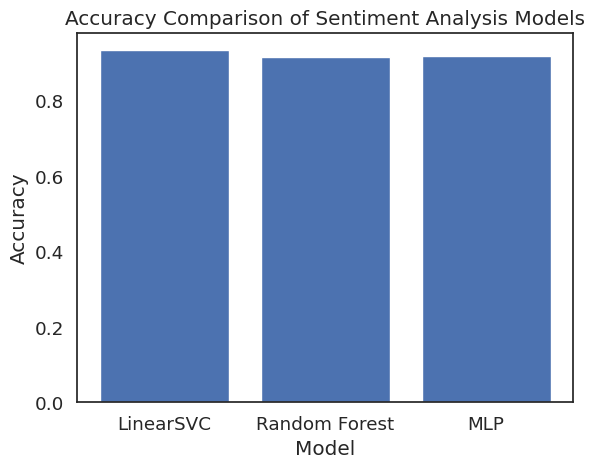

In [ ]:
# Plot accuracy comparison
models = ['LinearSVC', 'Random Forest', 'MLP']
accuracy_values = [svc_accuracy, rf_accuracy, mlp_accuracy]
plt.bar(models, accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Sentiment Analysis Models')
plt.show()

## MAE Comparison of Sentiment Analysis Models

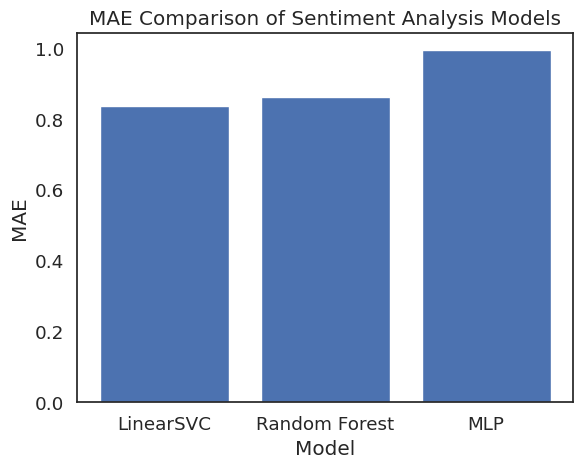

In [ ]:
# Plot MAE comparison
mae_values = [svc_mae, rf_mae, mlp_mae]

plt.bar(models, mae_values)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE Comparison of Sentiment Analysis Models')
plt.show()

## Comparison of 5 random movies with actual rating and new predicted rating

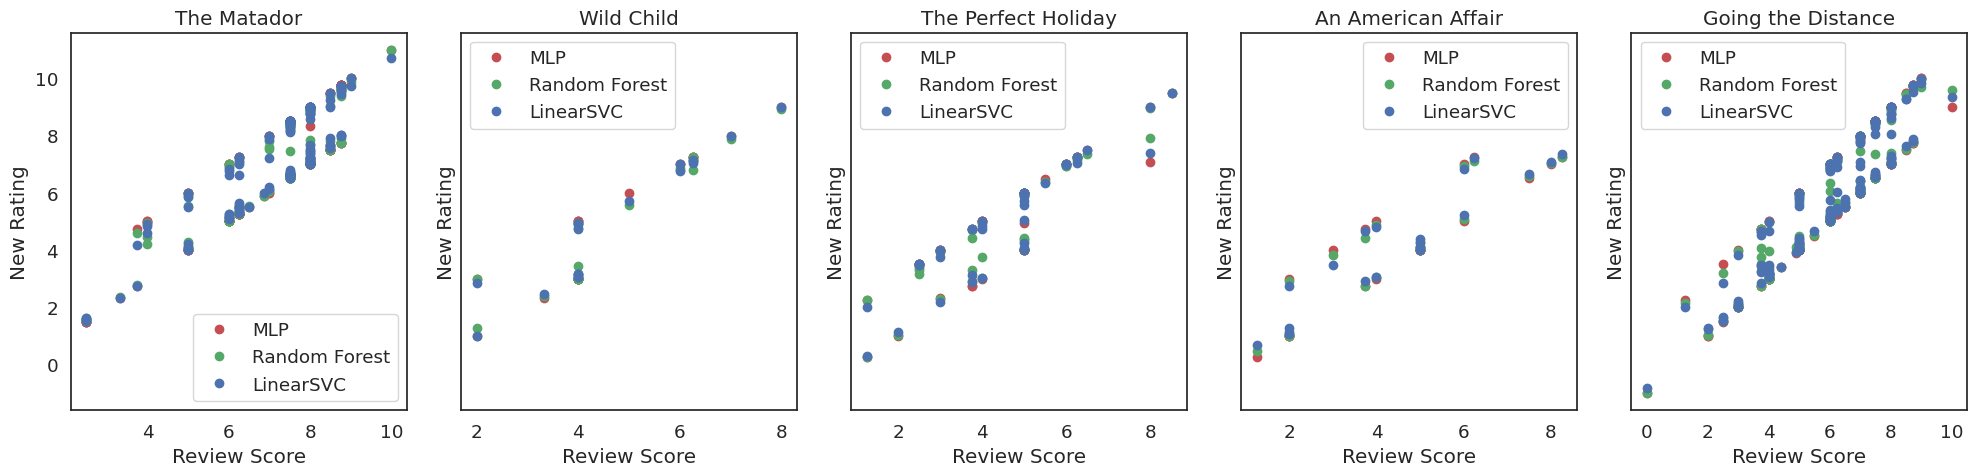

In [ ]:
import matplotlib.pyplot as plt

movies = ["The Matador", "Wild Child", "The Perfect Holiday", "An American Affair", "Going the Distance"]

# Filter the dataframe for the selected movies
selected_movies_df = merged_df[merged_df['movie_title'].isin(movies)]

# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Iterate over the selected movies
for i, movie in enumerate(movies):
    ax = axs[i]
    movie_data = selected_movies_df[selected_movies_df['movie_title'] == movie]
    
    # Plot the review score and new ratings for each model
    ax.plot(movie_data['review_score'], movie_data['mlp_new_rating'], 'ro', label='MLP')
    ax.plot(movie_data['review_score'], movie_data['rf_new_rating'], 'go', label='Random Forest')
    ax.plot(movie_data['review_score'], movie_data['svc_new_rating'], 'bo', label='LinearSVC')
    
    ax.set_title(movie)
    ax.set_xlabel('Review Score')
    ax.set_ylabel('New Rating')
    ax.legend()

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


## Explanation

### The Project allows users to input a movie name and retrieve the review score and new ratings from all three models for that specific movie.

### This functionality provides users with the ability to quickly access and compare the review score and new ratings of a specific movie. It offers valuable insights into how the sentiment analysis models perceive the movie and provides a more comprehensive view of its overall quality and likability.

In [ ]:
movie_name = input("Which movie would you like to check for the ratings and review score? ")
print("Movie name, " + movie_name + "!")

Which movie would you like to check for the ratings and review score? The Matador
Movie name, The Matador!


Movie:  The Matador
Review Score:  7.5
MLP New Rating:  8.4999999240111
Random Forest New Rating:  8.44
LinearSVC New Rating:  8.495212384792906


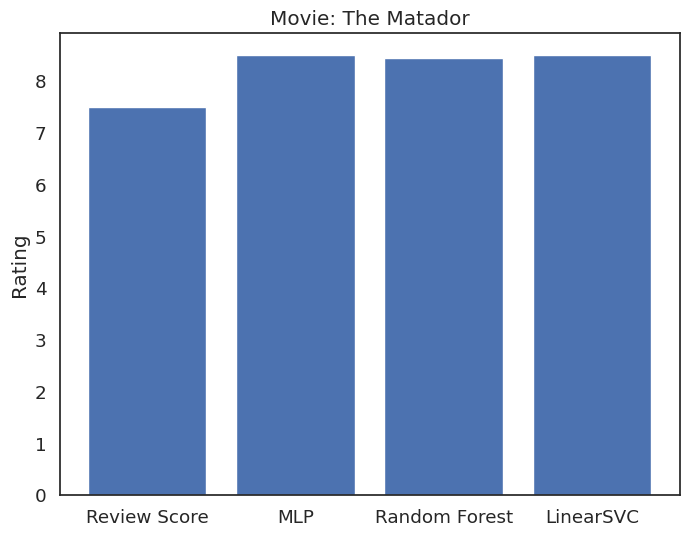

In [ ]:
# Filter the dataframe for the specified movie
selected_movie_df = merged_df[merged_df['movie_title'] == movie_name]

if selected_movie_df.empty:
    print("Movie not found in the dataset.")
else:
    review_score = selected_movie_df['review_score'].values[0]
    mlp_new_rating = selected_movie_df['mlp_new_rating'].values[0]
    rf_new_rating = selected_movie_df['rf_new_rating'].values[0]
    svc_new_rating = selected_movie_df['svc_new_rating'].values[0]

    print("Movie: ", movie_name)
    print("Review Score: ", review_score)
    print("MLP New Rating: ", mlp_new_rating)
    print("Random Forest New Rating: ", rf_new_rating)
    print("LinearSVC New Rating: ", svc_new_rating)

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the review score and new ratings for each model
    models = ['Review Score', 'MLP', 'Random Forest', 'LinearSVC']
    ratings = [review_score, mlp_new_rating, rf_new_rating, svc_new_rating]

    ax.bar(models, ratings)
    ax.set_ylabel('Rating')
    ax.set_title(f"Movie: {movie_name}")

    plt.show()


# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 

* **PDF Report**: please prepare a final report in the PDF form which should be at least 5 pages. The report should includes:

  * What is you motivation?

  * What data you collected?

  * How does this data support your product idea?

  * How did you analyse the data?

  * What did you find in the data?

  * (please include figures or tables in the report, but no source code)
  
* **PPT Slides**: please prepare PPT slides to present about the project. Each team present their case studies in class for 10 minutes. **Story-telling** is important, the slides should include:

  1. Motivation about the data collection, why the topic is interesting to you.

  2. Communicating Results (figure/table)

  3. Story telling (How all the parts (data, analysis, result) fit together as a story?)

Please compress all the files in a zipped file.

        
**Note: Each team only needs to submit one submission**